In [1]:
import numpy as np
import pandas as pd
import os
import re
from skimage import io
import matplotlib.pyplot as plt
import seaborn as sns
from glob import glob
import keras
%matplotlib inline

In [2]:
for dir,_, files in os.walk('/content/drive/MyDrive/Datasets/CT_MedicalImages'):
  print(dir)
  for filename in files:
    print(os.path.join(dir, filename))

/content/drive/MyDrive/Datasets/CT_MedicalImages
/content/drive/MyDrive/Datasets/CT_MedicalImages/full_archive.npz
/content/drive/MyDrive/Datasets/CT_MedicalImages/overview.csv
/content/drive/MyDrive/Datasets/CT_MedicalImages/Visualizing.py
/content/drive/MyDrive/Datasets/CT_MedicalImages/tiff_images
/content/drive/MyDrive/Datasets/CT_MedicalImages/tiff_images/ID_0001_AGE_0069_CONTRAST_1_CT.tif
/content/drive/MyDrive/Datasets/CT_MedicalImages/tiff_images/ID_0000_AGE_0060_CONTRAST_1_CT.tif
/content/drive/MyDrive/Datasets/CT_MedicalImages/tiff_images/ID_0006_AGE_0075_CONTRAST_1_CT.tif
/content/drive/MyDrive/Datasets/CT_MedicalImages/tiff_images/ID_0002_AGE_0074_CONTRAST_1_CT.tif
/content/drive/MyDrive/Datasets/CT_MedicalImages/tiff_images/ID_0007_AGE_0061_CONTRAST_1_CT.tif
/content/drive/MyDrive/Datasets/CT_MedicalImages/tiff_images/ID_0004_AGE_0056_CONTRAST_1_CT.tif
/content/drive/MyDrive/Datasets/CT_MedicalImages/tiff_images/ID_0005_AGE_0048_CONTRAST_1_CT.tif
/content/drive/MyDrive/Dat

In [3]:
BASE_IMG_PATH=os.path.join('..','/content/drive/MyDrive/Datasets/CT_MedicalImages')
path= os.path.join(BASE_IMG_PATH,'overview.csv')
overview = pd.read_csv(path)
overview.head()

,Unnamed: 0,Age,Contrast,ContrastTag,raw_input_path,id,tiff_name,dicom_name
0,0,60,True,NONE,../data/50_50_dicom_cases\Contrast\00001 (1).dcm,0,ID_0000_AGE_0060_CONTRAST_1_CT.tif,ID_0000_AGE_0060_CONTRAST_1_CT.dcm
1,1,69,True,NONE,../data/50_50_dicom_cases\Contrast\00001 (10).dcm,1,ID_0001_AGE_0069_CONTRAST_1_CT.tif,ID_0001_AGE_0069_CONTRAST_1_CT.dcm
2,2,74,True,APPLIED,../data/50_50_dicom_cases\Contrast\00001 (11).dcm,2,ID_0002_AGE_0074_CONTRAST_1_CT.tif,ID_0002_AGE_0074_CONTRAST_1_CT.dcm
3,3,75,True,NONE,../data/50_50_dicom_cases\Contrast\00001 (12).dcm,3,ID_0003_AGE_0075_CONTRAST_1_CT.tif,ID_0003_AGE_0075_CONTRAST_1_CT.dcm
4,4,56,True,NONE,../data/50_50_dicom_cases\Contrast\00001 (13).dcm,4,ID_0004_AGE_0056_CONTRAST_1_CT.tif,ID_0004_AGE_0056_CONTRAST_1_CT.dcm


In [4]:
len(overview)

100

In [5]:
overview['Contrast'] = overview['Contrast'].map(lambda x: 1 if x else 0)

In [6]:
overview['Contrast'] 

0     1
1     1
2     1
3     1
4     1
     ..
95    0
96    0
97    0
98    0
99    0
Name: Contrast, Length: 100, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


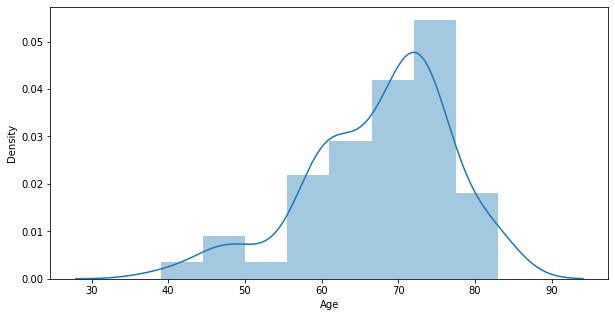

In [7]:
plt.figure(figsize=(10,5))
sns.distplot(overview['Age'])

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


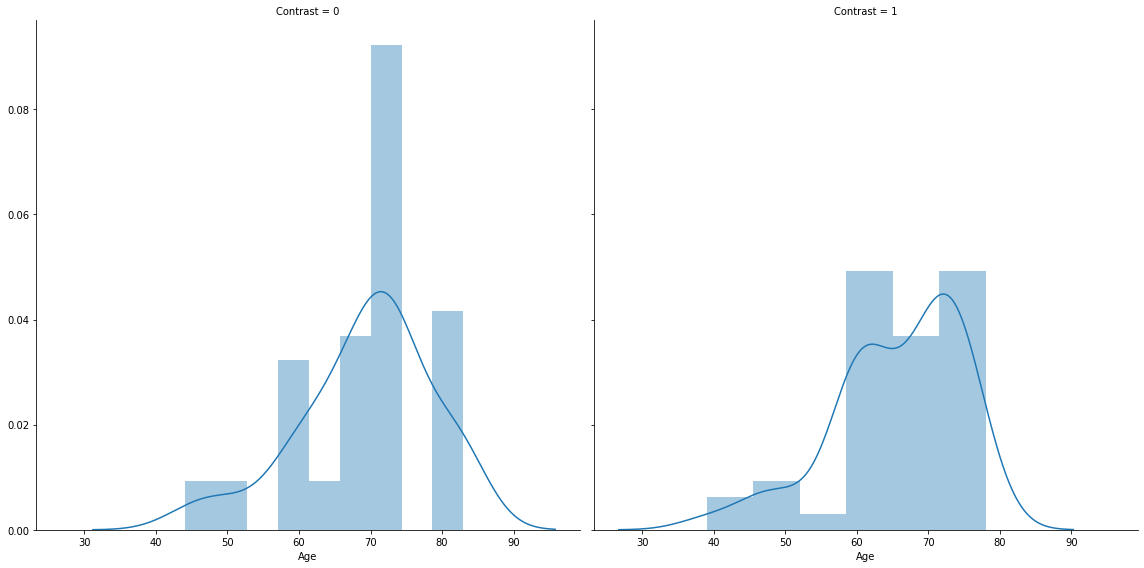

In [8]:
g = sns.FacetGrid(overview, col="Contrast", size=8)
g = g.map(sns.distplot, "Age")

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


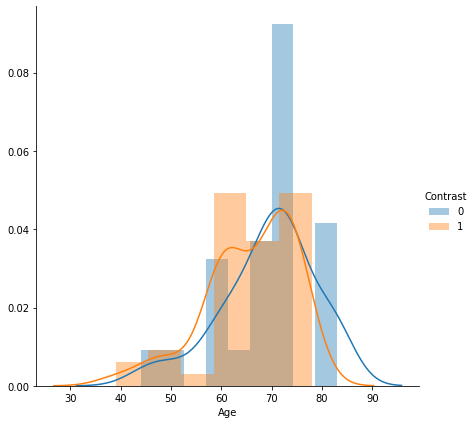

In [9]:
g = sns.FacetGrid(overview, hue="Contrast",size=6, legend_out=True)
g = g.map(sns.distplot, "Age").add_legend()

In [10]:
BASE_IMG_PATH=os.path.join('..','/content/drive/MyDrive/Datasets/CT_MedicalImages')
print(os.path.join(BASE_IMG_PATH,'tiff_images','*.tif'))
all_images_list = glob(os.path.join(BASE_IMG_PATH,'tiff_images','*.tif'))
all_images_list[:5]
print(all_images_list)

/content/drive/MyDrive/Datasets/CT_MedicalImages/tiff_images/*.tif
['/content/drive/MyDrive/Datasets/CT_MedicalImages/tiff_images/ID_0001_AGE_0069_CONTRAST_1_CT.tif', '/content/drive/MyDrive/Datasets/CT_MedicalImages/tiff_images/ID_0000_AGE_0060_CONTRAST_1_CT.tif', '/content/drive/MyDrive/Datasets/CT_MedicalImages/tiff_images/ID_0006_AGE_0075_CONTRAST_1_CT.tif', '/content/drive/MyDrive/Datasets/CT_MedicalImages/tiff_images/ID_0002_AGE_0074_CONTRAST_1_CT.tif', '/content/drive/MyDrive/Datasets/CT_MedicalImages/tiff_images/ID_0007_AGE_0061_CONTRAST_1_CT.tif', '/content/drive/MyDrive/Datasets/CT_MedicalImages/tiff_images/ID_0004_AGE_0056_CONTRAST_1_CT.tif', '/content/drive/MyDrive/Datasets/CT_MedicalImages/tiff_images/ID_0005_AGE_0048_CONTRAST_1_CT.tif', '/content/drive/MyDrive/Datasets/CT_MedicalImages/tiff_images/ID_0003_AGE_0075_CONTRAST_1_CT.tif', '/content/drive/MyDrive/Datasets/CT_MedicalImages/tiff_images/ID_0008_AGE_0051_CONTRAST_1_CT.tif', '/content/drive/MyDrive/Datasets/CT_Medic

In [11]:
io.imread(all_images_list[0]).shape

(512, 512)

In [12]:
np.array(np.arange(81)).reshape(9,9)

array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8],
       [ 9, 10, 11, 12, 13, 14, 15, 16, 17],
       [18, 19, 20, 21, 22, 23, 24, 25, 26],
       [27, 28, 29, 30, 31, 32, 33, 34, 35],
       [36, 37, 38, 39, 40, 41, 42, 43, 44],
       [45, 46, 47, 48, 49, 50, 51, 52, 53],
       [54, 55, 56, 57, 58, 59, 60, 61, 62],
       [63, 64, 65, 66, 67, 68, 69, 70, 71],
       [72, 73, 74, 75, 76, 77, 78, 79, 80]])

In [13]:
np.array(np.arange(81)).reshape(9,9)[::3,::3]

array([[ 0,  3,  6],
       [27, 30, 33],
       [54, 57, 60]])

In [14]:
np.expand_dims(io.imread(all_images_list[0])[::4,::4],0).shape

(1, 128, 128)

In [15]:
jimread = lambda x: np.expand_dims(io.imread(x)[::2,::2],0)
jimread 

<function __main__.<lambda>>

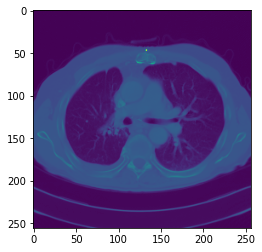

In [16]:
test_image = jimread(all_images_list[0])
plt.imshow(test_image[0])

In [17]:
check_contrast = re.compile(r'/content/drive/MyDrive/Datasets/CT_MedicalImages/tiff_images/ID_([\d]+)_AGE_[\d]+_CONTRAST_([\d]+)_CT.tif')
label = []
id_list = []
for image in all_images_list:
    id_list.append(check_contrast.findall(image)[0][0])
    label.append(check_contrast.findall(image)[0][1])

In [25]:
label_list = pd.DataFrame(label, id_list)

In [26]:
label_list.head()

,0
0001,1
0000,1
0006,1
0002,1
0007,1


In [28]:
images = np.stack([jimread(i) for i in all_images_list],0)
len(images)

100

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(images, label_list, test_size=0.1, random_state=0)  

In [30]:
n_train, depth, width, height = X_train.shape
n_test,_,_,_ = X_test.shape

In [31]:
n_train,depth, width, height

(90, 1, 256, 256)

In [32]:
input_shape = (width,height,depth)
input_shape

In [40]:
input_train = X_train.reshape((n_train, width,height,depth))
input_train.astype('float32')
input_train = input_train / np.max(input_train)
input_train.max()

1.0

In [34]:
input_test = X_test.reshape(n_test, *input_shape)
input_test.astype('float32')
input_test = input_test / np.max(input_test)

In [38]:
output_train = keras.utils.to_categorical(y_train, 2)
output_test = keras.utils.to_categorical(y_test, 2)
output_train[5]

array([0., 1.], dtype=float32)

In [41]:
input_train.shape

(90, 256, 256, 1)

In [42]:
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.optimizers import Adam
from keras.layers import Conv2D, MaxPooling2D

In [43]:
batch_size = 20
epochs = 40

In [44]:
model2 = Sequential()
model2.add(Conv2D(50, (5, 5), activation='relu', input_shape=input_shape))
model2.add(MaxPooling2D(pool_size=(3, 3))) # 3x3 Maxpooling 
model2.add(Conv2D(30, (4, 4), activation='relu', input_shape=input_shape))
model2.add(MaxPooling2D(pool_size=(2, 2))) # 2x2 Maxpooling 
model2.add(Flatten()) # 쭉풀어서 Fully Connected Neural Network를 만든다. 
model2.add(Dense(2, activation='softmax'))
model2.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 252, 252, 50)      1300      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 84, 84, 50)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 81, 81, 30)        24030     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 40, 40, 30)        0         
_________________________________________________________________
flatten (Flatten)            (None, 48000)             0         
_________________________________________________________________
dense (Dense)                (None, 2)                 96002     
Total params: 121,332
Trainable params: 121,332
Non-trainable params: 0
__________________________________________________

In [45]:
model2.compile(loss='categorical_crossentropy',
              optimizer=Adam(),
              metrics=['accuracy'])
history = model2.fit(input_train, output_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(input_test, output_test))

Epoch 1/40
5/5 [==============================] - 8s 1s/step - loss: 0.7101 - accuracy: 0.5100 - val_loss: 0.6968 - val_accuracy: 0.4000
Epoch 2/40
5/5 [==============================] - 7s 1s/step - loss: 0.6287 - accuracy: 0.5468 - val_loss: 0.5948 - val_accuracy: 0.8000
Epoch 3/40
5/5 [==============================] - 7s 1s/step - loss: 0.4957 - accuracy: 0.8725 - val_loss: 0.5255 - val_accuracy: 0.8000
Epoch 4/40
5/5 [==============================] - 7s 1s/step - loss: 0.2935 - accuracy: 0.9403 - val_loss: 0.5682 - val_accuracy: 0.7000
Epoch 5/40
5/5 [==============================] - 7s 1s/step - loss: 0.2050 - accuracy: 0.9271 - val_loss: 0.3240 - val_accuracy: 0.9000
Epoch 6/40
5/5 [==============================] - 7s 1s/step - loss: 0.0828 - accuracy: 0.9836 - val_loss: 0.5585 - val_accuracy: 0.7000
Epoch 7/40
5/5 [==============================] - 7s 1s/step - loss: 0.0480 - accuracy: 0.9856 - val_loss: 0.8134 - val_accuracy: 0.7000
Epoch 8/40
5/5 [=========================

In [46]:
score = model2.evaluate(input_test, output_test, verbose=0)
score

[1.1407878398895264, 0.800000011920929]